# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [137]:
view_lat_lngs = []
for lat_lng in zip(lats,lngs):
    view_lat_lngs.append((lat_lng[0], lat_lng[1]))
view_lat_lngs[0:10]

[(-74.73923996757651, 133.7831013108244),
 (62.154362333370045, 35.95014382734303),
 (-72.04203865576459, 54.04209828306202),
 (82.38017764926377, -98.71918019056864),
 (-80.00999981741415, -116.76972034547406),
 (67.5722269716137, -38.45361757542224),
 (-71.1144749473699, 156.42431316490166),
 (84.62884183953076, 121.55754700111993),
 (-45.511512353554814, 108.84133766572342),
 (31.064464105266282, -134.64632856388306)]

In [138]:
dir(citipy.nearest_city(-74.73923996757651, 133.7831013108244))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'city_name',
 'country_code']

In [139]:
print(citipy.nearest_city(-74.73923996757651, 133.7831013108244).city_name)
print(citipy.nearest_city(-74.73923996757651, 133.7831013108244).country_code)

new norfolk
au


In [140]:
print('City: ' + citipy.nearest_city(38.7,-90.4).city_name.title())
print('Country: ' + citipy.nearest_city(38.7,-90.4).country_code.upper())

City: Saint Ann
Country: US


In [141]:
testlats = np.random.uniform(low = -90, high = 90, size = 10)
testlats

array([ -6.54517069, -82.63497328,  86.49899465, -10.28954253,
       -78.47395598,  37.24711118, -83.93727835,  72.26344765,
       -39.72833262,  18.25883301])

In [82]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, opti

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [143]:
# My free plan is limited to 60 API calls per minute
# I need to make 634 calls to cover all my cities
# Is there a way to set a Python timer to space out my calls so I don't exceed my limit?
time.sleep(2)

In [144]:
# Test loop code on subset of cities
test_cities = cities[0:10]
test_cities

['new norfolk',
 'pudozh',
 'east london',
 'yellowknife',
 'punta arenas',
 'tasiilaq',
 'bluff',
 'saskylakh',
 'busselton',
 'half moon bay']

In [125]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city = 'saint louis'

# example request
req = requests.get(base_url + f'&q={city}').json()
req

{'coord': {'lon': -90.2, 'lat': 38.63},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 66.97,
  'feels_like': 64.42,
  'temp_min': 64.99,
  'temp_max': 70,
  'pressure': 1020,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 6.93, 'deg': 10},
 'clouds': {'all': 1},
 'dt': 1600399312,
 'sys': {'type': 1,
  'id': 5931,
  'country': 'US',
  'sunrise': 1600343075,
  'sunset': 1600387547},
 'timezone': -18000,
 'id': 4407066,
 'name': 'St Louis',
 'cod': 200}

In [165]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Your code here. A loop maybe? 
weather_data = {
    'src_city': [],
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Wind Speed': []
}
weather_df = pd.DataFrame(weather_data)


for city in cities:
    
    try:
        req = requests.get(base_url + f'&q={city}').json()

        weather_data['src_city'] = city
        weather_data['City'] = req['name']
        weather_data['Cloudiness'] = req['clouds']['all']
        weather_data['Country'] = req['sys']['country']
        weather_data['Date'] = req['dt']
        weather_data['Humidity'] = req['main']['humidity']
        weather_data['Lat'] = req['coord']['lat']
        weather_data['Lng'] = req['coord']['lon']
        weather_data['Max Temp'] = req['main']['temp_max']
        weather_data['Wind Speed'] = req['wind']['speed']

        #pprint(weather_data)

        weather_df = weather_df.append(weather_data, ignore_index = True)
    
        time.sleep(1) # make no more than 1 API call per second (free account limit is 60/min)  
        
    except:
        continue
    
#weather_df
print('Done')

Done


In [170]:
weather_df.head(15)

,src_city,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,New Norfolk,0.0,AU,1.600403e+09,46.0,-42.78,147.06,63.00,3.00
1,pudozh,Pudozh,96.0,RU,1.600403e+09,87.0,61.81,36.53,41.86,12.30
2,east london,East London,18.0,ZA,1.600403e+09,82.0,-33.02,27.91,55.40,4.70
3,yellowknife,Yellowknife,40.0,CA,1.600403e+09,75.0,62.46,-114.35,44.60,8.05
4,punta arenas,Punta Arenas,31.0,CL,1.600403e+09,89.0,-53.15,-70.92,32.00,28.86
5,tasiilaq,Tasiilaq,100.0,GL,1.600403e+09,86.0,65.61,-37.64,39.20,5.82
6,bluff,Bluff,100.0,NZ,1.600403e+09,82.0,-46.60,168.33,48.99,20.00
7,saskylakh,Saskylakh,0.0,RU,1.600403e+09,54.0,71.92,114.08,59.49,12.77
8,busselton,Busselton,54.0,AU,1.600403e+09,36.0,-33.65,115.33,68.00,13.42
9,half moon bay,Half Moon Bay,90.0,US,1.600403e+09,93.0,37.46,-122.43,66.99,3.36


In [176]:
'yellowknife' in list(weather_df['src_city'])

True

In [179]:
# Some cities didn't find anything with the API
cities_missing = []
for city in cities:
    if not city in list(weather_df['src_city']):
        cities_missing.append(city)
print(cities_missing)

['illoqqortoormiut', 'saleaula', 'mys shmidta', 'amderma', 'barentsburg', 'taolanaro', 'we', 'marcona', 'nizhneyansk', 'kerteh', 'tsihombe', 'belushya guba', 'samusu', 'la gaulette', 'sentyabrskiy', 'ondorhaan', 'lolua', 'mankovo-kalitvenskoye', 'eldikan', 'uk', 'dien bien', 'kuche', 'rungata', 'umzimvubu', 'doctor pedro p. pena', 'bolshegrivskoye', 'tabulbah', 'mrirt', 'halalo', 'carikar', 'grand centre', 'tunduru', 'chorbog', 'parras', 'bolungarvik', 'malwan', 'urdzhar', 'sorvag', 'louisbourg', 'chagda', 'vaitupu', 'buariki', 'mudyuga', 'grand river south east', 'palabuhanratu', 'formoso do araguaia', 'bandar-e torkaman', 'satitoa', 'haibowan']


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [168]:
weather_df.to_csv('city_weather.csv', index = False)

In [2]:
# read data back in from csv so I can work with it in the future without having to recreate it
weather_df = pd.read_csv('city_weather.csv')

In [3]:
weather_df['Date'] = weather_df['Date'].astype(int)

In [4]:
weather_df.count()

src_city      585
City          585
Cloudiness    585
Country       580
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
weather_df.head()

,src_city,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,New Norfolk,0.0,AU,1600403487,46.0,-42.78,147.06,63.00,3.00
1,pudozh,Pudozh,96.0,RU,1600403489,87.0,61.81,36.53,41.86,12.30
2,east london,East London,18.0,ZA,1600403490,82.0,-33.02,27.91,55.40,4.70
3,yellowknife,Yellowknife,40.0,CA,1600403409,75.0,62.46,-114.35,44.60,8.05
4,punta arenas,Punta Arenas,31.0,CL,1600403492,89.0,-53.15,-70.92,32.00,28.86


In [9]:
# Some cities don't have a country assigned in the API
weather_df[weather_df['Country'].isna()]

,src_city,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
111,henties bay,Henties Bay,0.0,NaN,1600403628,94.0,-22.12,14.28,53.01,3.00
340,oranjemund,Oranjemund,9.0,NaN,1600403907,94.0,-28.55,16.43,54.52,7.54
384,luderitz,Lüderitz,0.0,NaN,1600403959,68.0,-26.65,15.16,55.63,12.50
441,karasburg,Karasburg,0.0,NaN,1600404030,36.0,-28.02,18.75,55.17,8.41
445,walvis bay,Walvis Bay,0.0,NaN,1600404035,93.0,-22.96,14.51,53.01,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

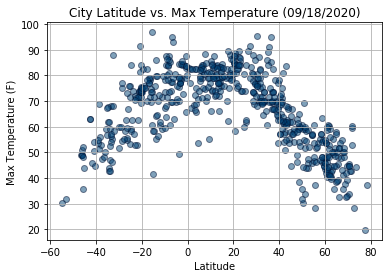

In [13]:
# create plot
fig, ax = plt.subplots()
ax.scatter(
    x = 'Lat', y = 'Max Temp', data = weather_df,
    c = '#004477', alpha = 0.5, edgecolors = '#001133',
    linewidths = 1)

# format chart
plt.title('City Latitude vs. Max Temperature (09/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# save as png
plt.savefig('Latitude_vs_MaxTemp.png', dpi = 600)

# show result
plt.show()

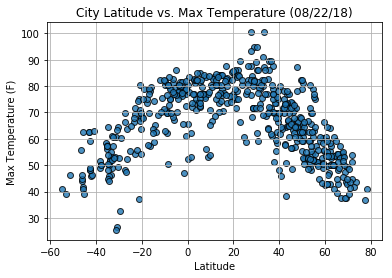

#### Latitude vs. Humidity Plot

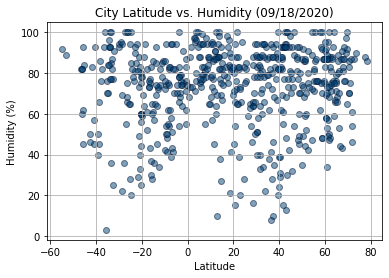

In [16]:
# create plot
fig, ax = plt.subplots()
ax.scatter(
    x = 'Lat', y = 'Humidity', data = weather_df,
    c = '#004477', alpha = 0.5, edgecolors = '#001133',
    linewidths = 1)

# format chart
plt.title('City Latitude vs. Humidity (09/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# save as png
plt.savefig('Latitude_vs_Humidity.png', dpi = 600)

# show result
plt.show()

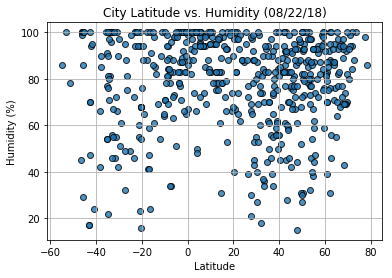

#### Latitude vs. Cloudiness Plot

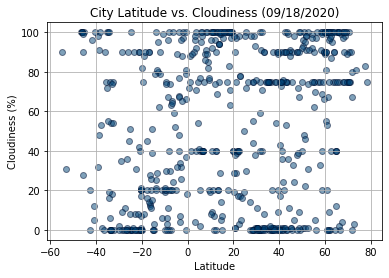

In [18]:
# create plot
fig, ax = plt.subplots()
ax.scatter(
    x = 'Lat', y = 'Cloudiness', data = weather_df,
    c = '#004477', alpha = 0.5, edgecolors = '#001133',
    linewidths = 1)

# format chart
plt.title('City Latitude vs. Cloudiness (09/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# save as png
plt.savefig('Latitude_vs_Cloudiness.png', dpi = 600)

# show result
plt.show()

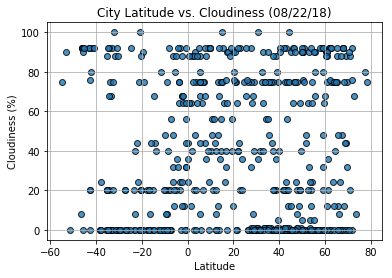

#### Latitude vs. Wind Speed Plot

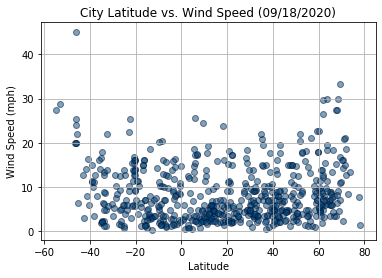

In [20]:
# create plot
fig, ax = plt.subplots()
ax.scatter(
    x = 'Lat', y = 'Wind Speed', data = weather_df,
    c = '#004477', alpha = 0.5, edgecolors = '#001133',
    linewidths = 1)

# format chart
plt.title('City Latitude vs. Wind Speed (09/18/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# save as png
plt.savefig('Latitude_vs_Wind.png', dpi = 600)

# show result
plt.show()

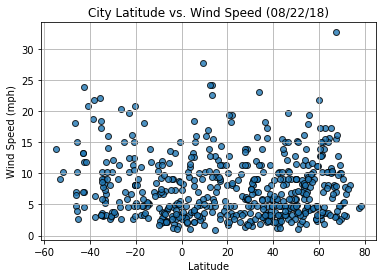

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [22]:
import seaborn as sns

In [104]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``

In [21]:
# calculate reference variables
avg_temp = weather_df['Max Temp'].mean()
avg_hum = weather_df['Humidity'].mean()

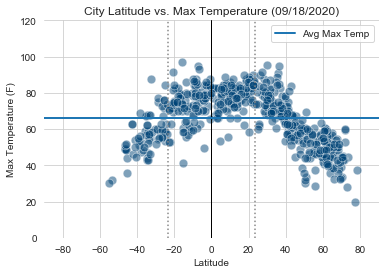

In [33]:
# set Seaborn style
sns.set_style('whitegrid')

# create plot
lat_temp = sns.scatterplot(
    x = 'Lat', y = 'Max Temp', data = weather_df,
    s = 75, color = '#004477', alpha = 0.5)

# format chart
sns.despine(left = True, bottom = True)
lat_temp.set_title('City Latitude vs. Max Temperature (09/18/2020)')
lat_temp.set(
    xlabel = 'Latitude',
    ylabel = 'Max Temperature (F)')
lat_temp.set_ylim(ymin = 0, ymax = 120)
lat_temp.set_xlim(xmin = -90, xmax = 90)


# Add reference lines for Tropic of Cancer and Tropic of Capricorn
plt.plot([-23.4366,-23.4366],[0,120],linewidth = 1.5, linestyle = 'dotted', color = '#888888')
plt.plot([23.4366,23.4366],[0,120],linewidth = 1.5, linestyle = 'dotted', color = '#888888')

# Add reference line for the equator
plt.plot([0,0],[0,120],linewidth = 1, color = '#000000')

# Add reference line for the average temperature
plt.plot([-90,90],[avg_temp, avg_temp], linewidth = 2, label = 'Avg Max Temp')
plt.legend()


# save as png
plt.savefig('sns_Latitude_vs_MaxTemp.png', dpi = 600)

# show result
plt.show()

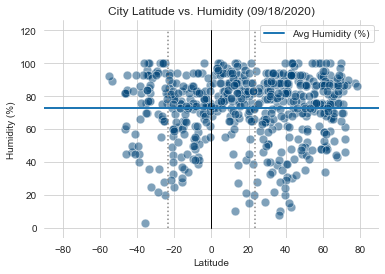

In [37]:
# set Seaborn style
sns.set_style('whitegrid')

# create plot
lat_hum = sns.scatterplot(
    x = 'Lat', y = 'Humidity', data = weather_df,
    s = 75, color = '#004477', alpha = 0.5)

# format chart
sns.despine(left = True, bottom = True)
lat_hum.set_title('City Latitude vs. Humidity (09/18/2020)')
lat_hum.set(
    xlabel = 'Latitude',
    ylabel = 'Humidity (%)')
lat_hum.set_xlim(xmin = -90, xmax = 90)


# Add reference lines for Tropic of Cancer and Tropic of Capricorn
plt.plot([-23.4366,-23.4366],[0,120],linewidth = 1.5, linestyle = 'dotted', color = '#888888')
plt.plot([23.4366,23.4366],[0,120],linewidth = 1.5, linestyle = 'dotted', color = '#888888')

# Add reference line for the equator
plt.plot([0,0],[0,120],linewidth = 1, color = '#000000')

# Add reference line for the average humidity
plt.plot([-90,90],[avg_hum, avg_hum], linewidth = 2, label = 'Avg Humidity (%)')
plt.legend()


# save as png
plt.savefig('sns_Latitude_vs_Humidity.png', dpi = 600)

# show result
plt.show()

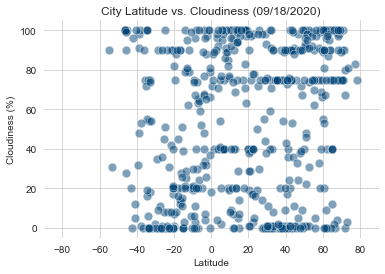

In [38]:
# set Seaborn style
sns.set_style('whitegrid')

# create plot
lat_cloud = sns.scatterplot(
    x = 'Lat', y = 'Cloudiness', data = weather_df,
    s = 75, color = '#004477', alpha = 0.5)

# format chart
sns.despine(left = True, bottom = True)
lat_cloud.set_title('City Latitude vs. Cloudiness (09/18/2020)')
lat_cloud.set(
    xlabel = 'Latitude',
    ylabel = 'Cloudiness (%)')
lat_cloud.set_xlim(xmin = -90, xmax = 90)

# save as png
plt.savefig('sns_Latitude_vs_Cloudiness.png', dpi = 600)

# show result
plt.show()

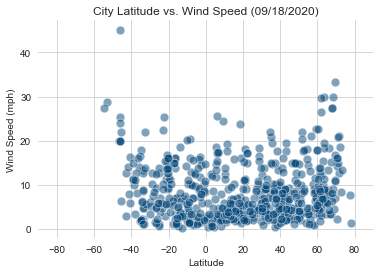

In [39]:
# set Seaborn style
sns.set_style('whitegrid')

# create plot
lat_wind = sns.scatterplot(
    x = 'Lat', y = 'Wind Speed', data = weather_df,
    s = 75, color = '#004477', alpha = 0.5)

# format chart
sns.despine(left = True, bottom = True)
lat_wind.set_title('City Latitude vs. Wind Speed (09/18/2020)')
lat_wind.set(
    xlabel = 'Latitude',
    ylabel = 'Wind Speed (mph)')
lat_wind.set_xlim(xmin = -90, xmax = 90)

# save as png
plt.savefig('sns_Latitude_vs_Wind.png', dpi = 600)

# show result
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

<b>Observation 1</b>

Looking at the Max Temperature chart, you can see a clear arc, with the highest maximum temperatures recorded within about 50 degrees of the equator (-20 to +30 degrees latitude).

Outside of this range, temperatures begin quickly dropping, with cities at the more extreme latitudes reporting their daily highs between 20-40°F. This is a significant difference from the near 100°F temperatures recorded closer to the equator.

<b>Observation 2</b>

From the Humidity chart, it appears cities nearer the equator consistently reported higher humidity levels than cities elsewhere. There is considerably less spread among the data points for cities between -5° and +10° latitude, with the vast majority reporting between 75-100% humidity (above average). 

Other latitudes seem to have more variation in their humidity levels.

<b>Observation 3</b>

The Cloudiness chart reveals that some levels of cloudiness appear to be more frequently reported than others. There are a number of data points clustered along certain percentages: 0, 20, 40, 75, 90 and 100.

This may be due to observation bias on behalf of the person recording the clouidness measurements, or due to precision limitations of the equipment used to collect the measurements.

### BONUS WORK
#### Add features

In [42]:
# Create a column with the absolute value of Latitude 
# (simply shows how far a city is from the equator, regardless of whether it's north or south)
weather_df["Lat_Abs"] = abs(weather_df["Lat"])

In [43]:
# Create bins and bin labels for the latitude regions column
lat_bins = [0, 23.4366, 35, 66.55, 90]
lat_labels = ["Tropic", "Sub-Tropic", "Temperate", "Frigid"]

# Classify each city according to its latitude region (Tropic, Sub-Tropic, Temperate, Frigid)
weather_df['Lat Range'] = pd.cut(weather_df["Lat_Abs"], lat_bins, labels=lat_labels)

In [44]:
# check out the new feature
weather_df[weather_df['Lat Range'] == 'Frigid'].head(10)

,src_city,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Lat_Abs,Lat Range
7,saskylakh,Saskylakh,0.0,RU,1600403496,54.0,71.92,114.08,59.49,12.77,71.92,Frigid
56,khatanga,Khatanga,80.0,RU,1600403558,46.0,71.97,102.50,60.17,18.48,71.97,Frigid
62,chokurdakh,Chokurdakh,100.0,RU,1600403565,83.0,70.63,147.92,45.36,14.25,70.63,Frigid
70,clyde river,Clyde River,90.0,CA,1600403574,86.0,70.47,-68.59,33.80,2.24,70.47,Frigid
84,verkhoyansk,Verkhoyansk,4.0,RU,1600403593,43.0,67.54,133.38,54.70,3.31,67.54,Frigid
106,qaanaaq,Qaanaaq,83.0,GL,1600403621,88.0,77.48,-69.36,19.80,7.81,77.48,Frigid
107,tuktoyaktuk,Tuktoyaktuk,75.0,CA,1600403622,100.0,69.45,-133.04,39.20,6.93,69.45,Frigid
113,cherskiy,Cherskiy,98.0,RU,1600403631,76.0,68.75,161.30,37.85,4.61,68.75,Frigid
115,upernavik,Upernavik,3.0,GL,1600403633,87.0,72.79,-56.15,28.27,8.43,72.79,Frigid
120,dikson,Dikson,81.0,RU,1600403639,90.0,73.51,80.55,44.35,13.38,73.51,Frigid


In [45]:
# Calculations for reference variables
avg_temp = weather_df['Max Temp'].mean()
avg_hum = weather_df['Humidity'].mean()

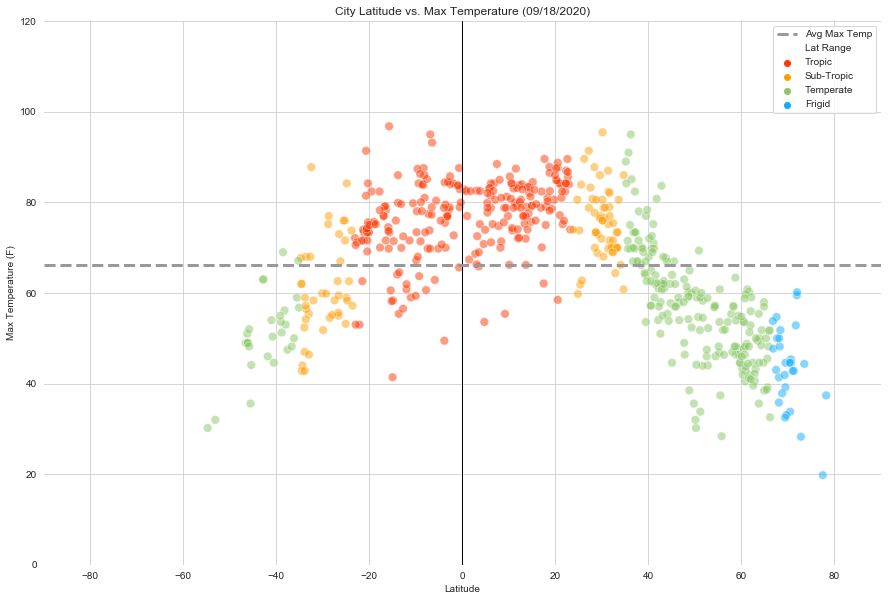

In [54]:
# set styles
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

region_list = ['Tropic','Sub-Tropic','Temperate','Frigid']
region_colors = {'Tropic':'#FE3703', 'Sub-Tropic':"#FE9E05", 'Temperate':'#89C765', 'Frigid':'#0EACFD'}

# create plot
lat_temp = sns.scatterplot(
    x = 'Lat', y = 'Max Temp', data = weather_df,
    s = 75, alpha = 0.5,
    hue = 'Lat Range', hue_order = region_list,
    palette = region_colors)

# format chart
sns.despine(left = True, bottom = True)
lat_temp.set_title('City Latitude vs. Max Temperature (09/18/2020)')
lat_temp.set(
    xlabel = 'Latitude',
    ylabel = 'Max Temperature (F)')
lat_temp.set_ylim(ymin = 0, ymax = 120)
lat_temp.set_xlim(xmin = -90, xmax = 90)


# add reference line for the equator
plt.plot([0,0],[0,120],linewidth = 1, color = '#000000')

# add reference line for the average temperature
plt.plot([-90,90],[avg_temp, avg_temp], linewidth = 3, linestyle = '--', label = 'Avg Max Temp', color = '#999999')
plt.legend()


# save as png
plt.savefig('sns_cat_Latitude_vs_MaxTemp.png', dpi = 600)

# show result
plt.show()

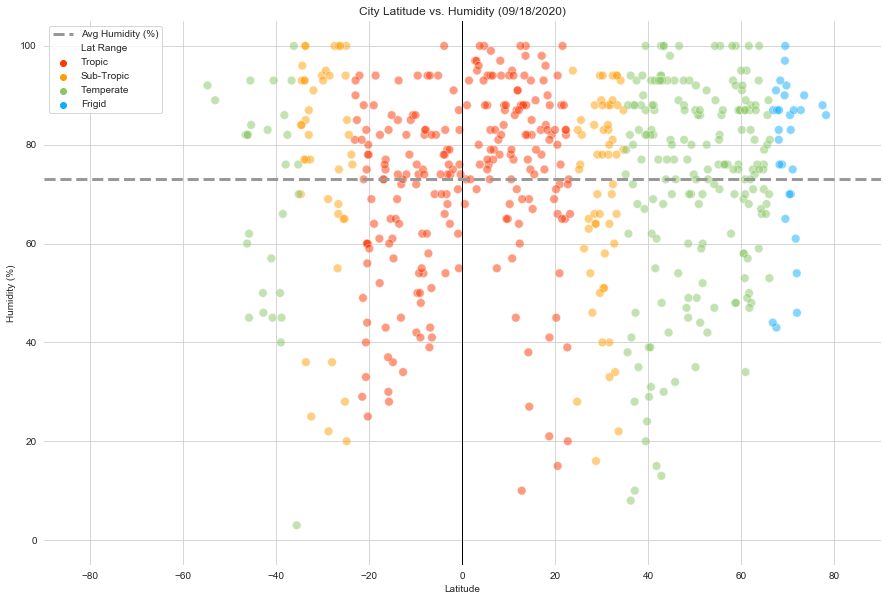

In [57]:
# set styles
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

# create plot
lat_hum = sns.scatterplot(
    x = 'Lat', y = 'Humidity', data = weather_df,
    s = 75, alpha = 0.5,
    hue = 'Lat Range', hue_order = region_list, palette = region_colors)

# format chart
sns.despine(left = True, bottom = True)
lat_hum.set_title('City Latitude vs. Humidity (09/18/2020)')
lat_hum.set(
    xlabel = 'Latitude',
    ylabel = 'Humidity (%)')
lat_hum.set_ylim(ymin = -5, ymax = 105)
lat_hum.set_xlim(xmin = -90, xmax = 90)


# Add reference line for the equator
plt.plot([0,0],[-5,120],linewidth = 1, color = '#000000')

# Add reference line for the average humidity
plt.plot([-90,90],[avg_hum, avg_hum], linewidth = 3, linestyle = '--', color = '#999999', label = 'Avg Humidity (%)')
plt.legend()


# save as png
plt.savefig('sns_cat_Latitude_vs_Humidity.png', dpi = 600)

# show result
plt.show()

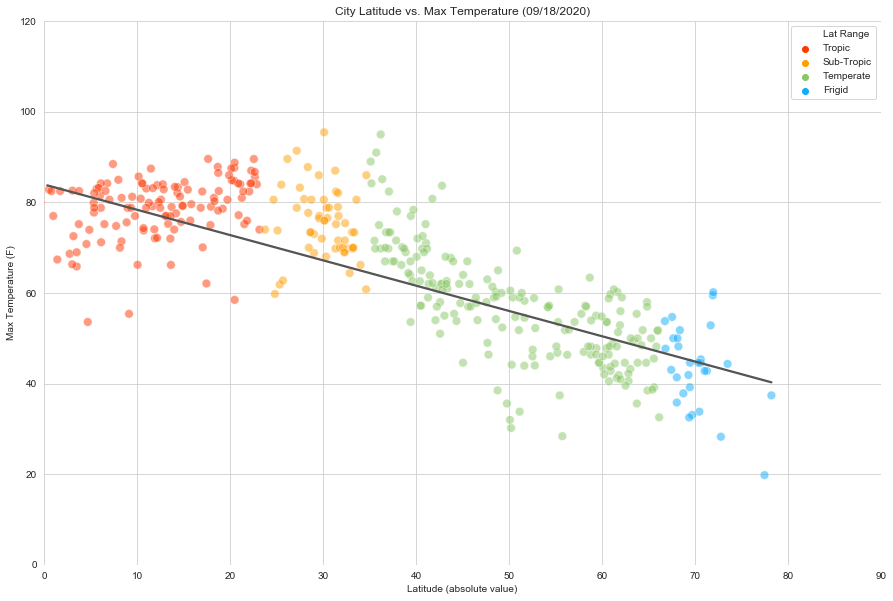

In [66]:
## this time use the absolute value for latitude and add a trend line

# set styles
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

# create plot
lat_temp = sns.scatterplot(
    x = 'Lat', y = 'Max Temp', data = weather_df,
    s = 75, alpha = 0.5,
    hue = 'Lat Range', hue_order = region_list, palette = region_colors)

# add regression trend line to show how temperatures change as you move away from the equator
sns.regplot(x = "Lat_Abs", y = "Max Temp", ci = None, data = weather_df, color = "#555555", marker = '')

# format chart
sns.despine(left = True, bottom = True)
lat_temp.set_title('City Latitude vs. Max Temperature (09/18/2020)')
lat_temp.set(
    xlabel = 'Latitude (absolute value)',
    ylabel = 'Max Temperature (F)')
lat_temp.set_ylim(ymin = 0, ymax = 120)
lat_temp.set_xlim(xmin = 0, xmax = 90)

plt.legend()

# save as png
plt.savefig('sns_cat_reg_AbsLatitude_vs_MaxTemp.png', dpi = 600)

# show result
plt.show()

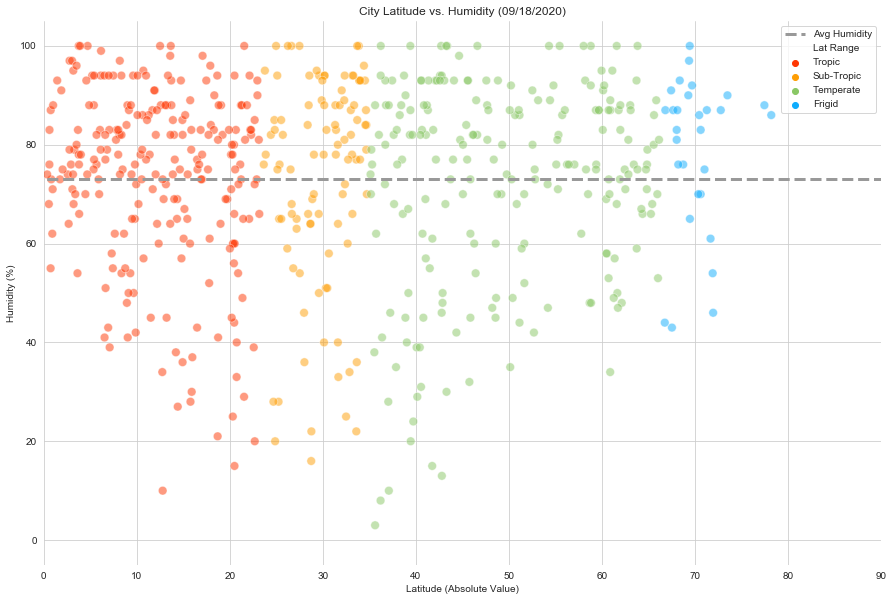

In [69]:
# Try humidity chart with absolute value also

# set styles
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))

# create plot
lat_hum = sns.scatterplot(
    x = 'Lat_Abs', y = 'Humidity', data = weather_df,
    s = 75, alpha = 0.5,
    hue = 'Lat Range', hue_order = region_list, palette = region_colors)

# format chart
sns.despine(left = True, bottom = True)
lat_hum.set_title('City Latitude vs. Humidity (09/18/2020)')
lat_hum.set(
    xlabel = 'Latitude (Absolute Value)',
    ylabel = 'Humidity (%)')
lat_hum.set_ylim(ymin = -5, ymax = 105)
lat_hum.set_xlim(xmin = 0, xmax = 90)


# Add reference line for the average temperature
plt.plot([-90,90],[avg_hum, avg_hum], linewidth = 3, linestyle = '--', label = 'Avg Humidity', color = '#999999')
plt.legend()


# save as png
plt.savefig('sns_cat_AbsLatitude_vs_Humidity.png', dpi = 600)

# show result
plt.show()

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 